In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Datos de Diabetes
datos_diabetes = pd.read_csv('/home/juan/machineLearning2025/datasets/diabetes_012_health_indicators_BRFSS2015.csv')

datos_diabetes

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Información de los datos:
Dataset de origen de origen:

El Sistema de VIgilancia de Factores de Riesgo en el Comportamiento (BRFSS) se encarga de realizar encuestas telefónicas relacionadas con la salud de los residentes de EE.UU., relativos a sus comportamientos de riesgos para su salud, como lo son enfermedades crónicas, hábitos de preveención de enfermedades y uso de servicios de salud. 

https://www.cdc.gov/brfss/annual_data/annual_data.htm


El dataset usado para este proyecto toma deatos de la fuente anterior, especificamente del 2015, y selecciona 22 caracteristicas para estudiar la diabetes en los residentes de EE.UU.

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset


Dataset desbalanceado. 22 variables. Variaable predictora: diabetes.

Diabetes_012 -> 0 no diabetes, 1 prediabetes, 2 diabetes. Varliable Categórica.

HighBP-> Hipertension. Variable Boolena.

HighChol -> COlesterol alto. Variable Booleana.

CholCheck-> Chequeo de colesterol los ultimos 5 años. Variable Booleana.

BMI -> Indice de masa corporal. Variable discreta.

Smoker ->Ha fumado al menos 100 cigarrros en su vida. Variable booleana.

Stroke -> Derrame cerebral. Variable booleana.

HeartDiseaseorAttack -> infarto coronario o infarto al miocardio. Variable booleana.

PhysActivity -> Actividad fisica los ultimos 30 dias. Variable booleana.

Fruits -> Consume al menos 1 fruta al dia. Variable booleana.

Veggies -> Consume vegetales al menos 1 vez al dia. Variable booleana.

HvyAlcoholConsump -> Hombres que toman mas de 14 bebidas alcoholicas por semana, mujeres mas de 7. Variable booleana.

AnyHealthcare-> Tiene algun seguro médico. Variable booleana.

NoDocbcCost-> En el ultimo año, no visito a un doctor debido a no poder costear los servicios médicos. Variable booleana.

GenHlth -> Opinion de salud general, tu salud general es? Escala 1-5. Variable categórica.

MentHlth -> Por cuantos dias durante el ultimo mes (1-30) no tuviste una salud buena?. Variable categórica. 

PhysHlth -> Por cuantos dias durante el ultimo mes (1-30) tu salud no fue buena?. Variable categórica.

DiffWalk -> TIenes dificultades para caminar o subir escaleras?. Variable booleana.

Sex -> 0=Femenino, 1= Masculino. Variable boolena.

Age ->  escala del 1-13, 1= 18-24, 2=25-29, 3=30-34, 4=35-39, 5=40-44, 6=45-49, 7=50-54 , 8=55-59 , 9=60-64, 10= 65-69, 11= 70-74, 12=75-79 ,13=80 o mayores. Variable categórica.

Education -> escala del 1-6, 1=nunca fue a la escuela o solo kinder, 2=grados 1-8, 3= grados 9-11, 4= grado 12 o graduados de HIgh school, 5= 1-3 de universidad, 6= 4 o mas a;os de universidad. Variable categórica.

Income -> escala 1-8 1= menos de 10,000, 5= menos de 35,000, 8=75,000 o más. Variable categórica.


In [3]:
#Crear la columna diabetes_01 que unifique prediabetes con diabetes
datos_diabetes['diabetes_01'] = datos_diabetes['Diabetes_012']
datos_diabetes['diabetes_01'] = datos_diabetes['diabetes_01'].replace(2,1)

#datos_diabetes = datos_diabetes.rename(columns={'Diabetes_012':'diabetes'})

In [4]:
# mostrar información del DataFrame
def info(df):
    print('Duplicated: ',df.duplicated().sum())
    print('Null values %:')
    print(100*df.isnull().sum()/len(df))

info(datos_diabetes)

Duplicated:  23899
Null values %:
Diabetes_012            0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
diabetes_01             0.0
dtype: float64


In [5]:
#Borrar datos duplicados.
datos_diabetes.drop_duplicates(inplace=True)

datos_diabetes.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
diabetes_01             float64
dtype: object

In [6]:
datos_diabetes.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,diabetes_01
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,...,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383,0.172886
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,...,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477,0.378150
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [7]:
#Definicion de datos enteros.
#datos_diabetes[['diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'BMI', 'Age', 'Education', 'Income' ]] = datos_diabetes[['diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'BMI', 'Age', 'Education', 'Income']].astype(int)

#Definicion de datos enteros.
for col in datos_diabetes.columns:
    #if datos_diabetes[col].dtype == 'float64':
    datos_diabetes[col] = datos_diabetes[col].astype(int)


#Ver balanceo de la clase objetivo. Diabetes_012
porcentaje = 100*datos_diabetes['Diabetes_012'].value_counts()/len(datos_diabetes)
print(porcentaje.astype(str) + '%')

Diabetes_012
0     82.71136429904996%
2    15.274108825359798%
1     2.014526875590236%
Name: count, dtype: object


In [8]:
datos_diabetes.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,diabetes_01
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,...,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383,0.172886
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,...,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477,0.378150
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


/tmp/ipykernel_6217/80556761.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Femenino', 'Masculino'])


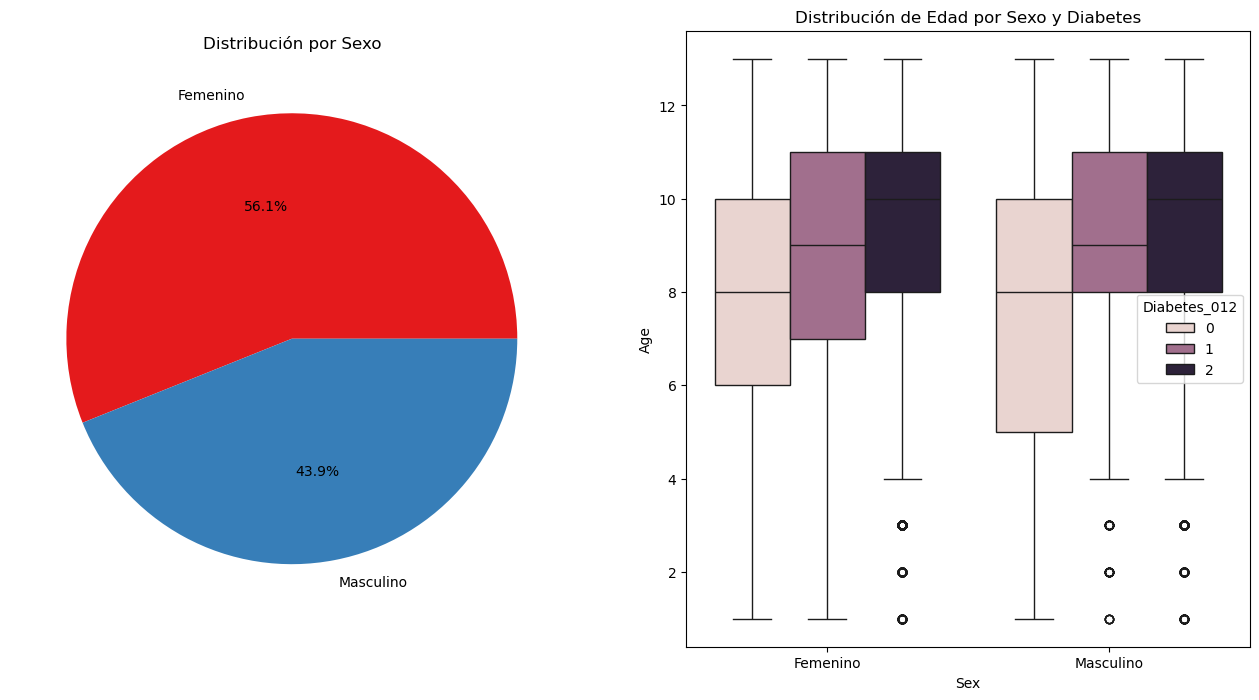

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sexo_counts = datos_diabetes['Sex'].value_counts()
sexo_labels = {1: "Masculino", 0: "Femenino"}
sexo_counts.index = sexo_counts.index.map(sexo_labels)

axes[0].pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette('Set1', len(sexo_counts)))
axes[0].set_title('Distribución por Sexo')

#Gráficas de cajas
sns.boxplot(data=datos_diabetes, x='Sex', y='Age', hue='Diabetes_012', ax=axes[1])
axes[1].set_title('Distribución de Edad por Sexo y Diabetes')
axes[1].set_xticklabels(['Femenino', 'Masculino'])

plt.show()

In [10]:
#sns.displot(datos_diabetes, x="BMI", hue="diabetes_01", kind="kde", height=3, aspect=1.5, multiple="stack") 

<Axes: >

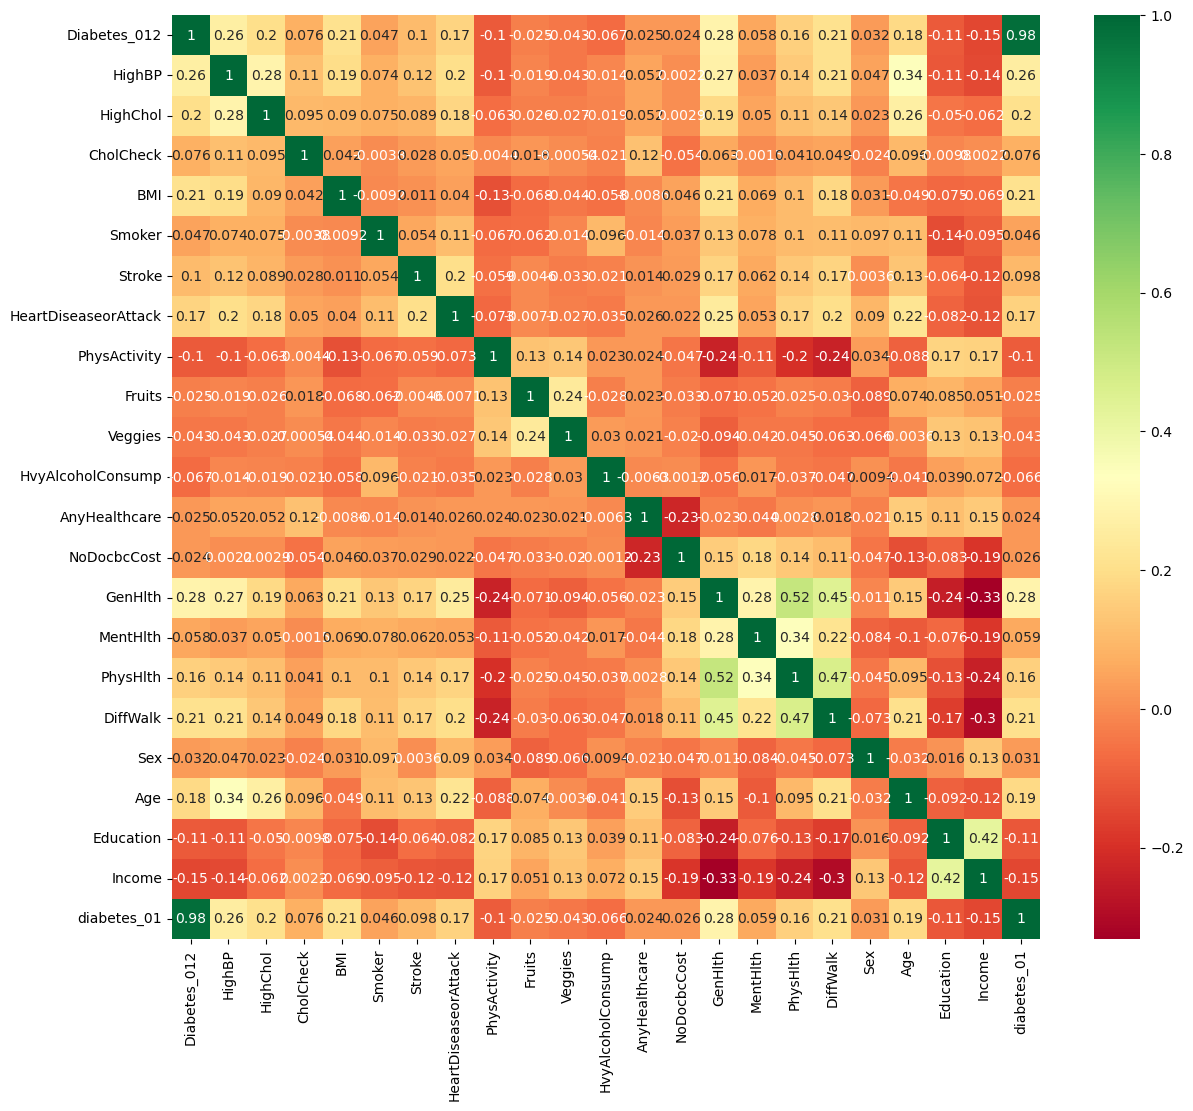

In [11]:

correlacion = datos_diabetes.corr()

correlacion
plt.figure(figsize=(14, 12)) 
sns.heatmap(correlacion, annot=True, cbar=True, cmap="RdYlGn")

<Axes: >

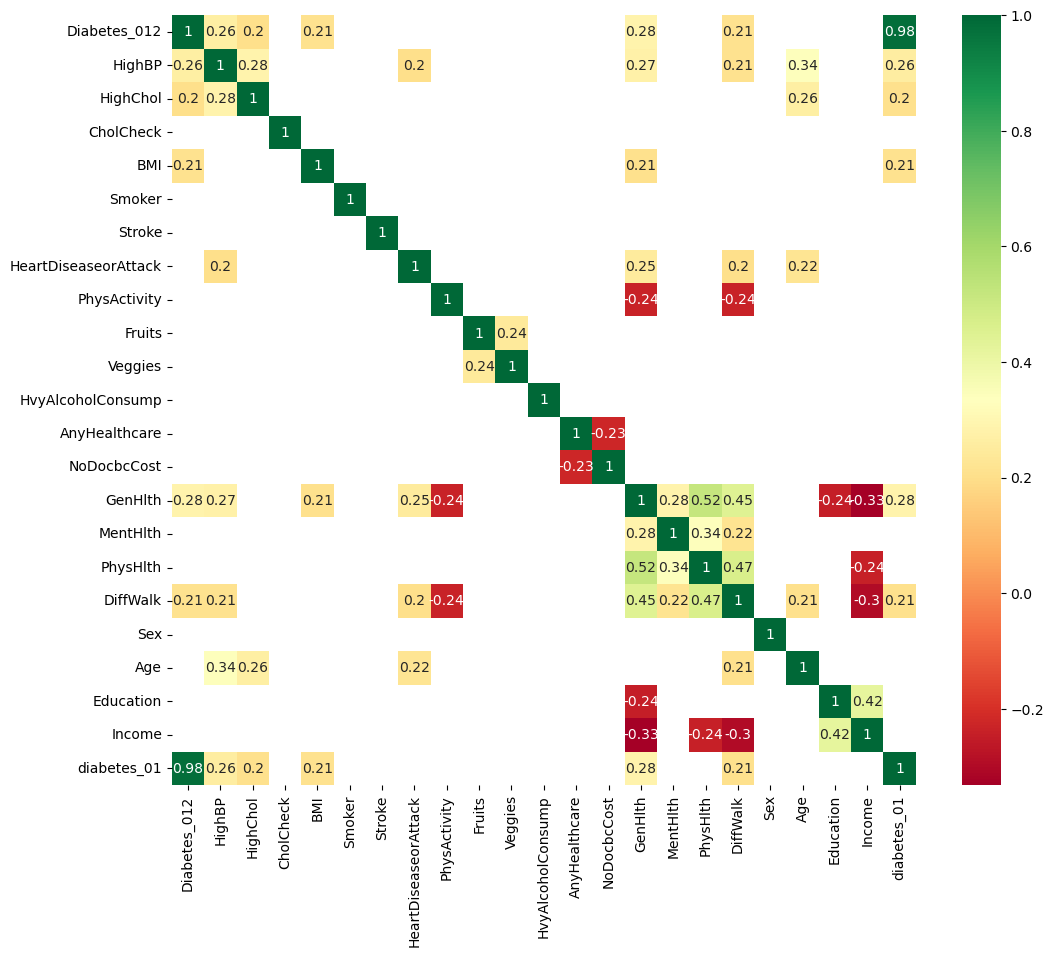

In [12]:

rango_a = 0.2
rango_b = -0.2

# Aplicar filtro
filtro = (correlacion >= rango_a) | (correlacion <= rango_b)
correlacion_filtrada = correlacion.where(filtro)

# matriz de correlación filtrada
plt.figure(figsize=(12, 10)) 
sns.heatmap(correlacion_filtrada, annot=True, cbar=True, cmap="RdYlGn")

Variables más correlacionadas ($correlacion > \left|0.3\right| $):

*PhysHlth y  GenHlth: 0.52

*PhysHlth y MentHlth: 0.34

*PhysHlth y DiffWalk: 0.47

*GenHlth y DiffWalk: 0.45

*Income y Education: 0.42

*Income y GenHlth: -0.33

*Income y DiffWalk: -0.3

*Age vs HighBP: 0.34


In [13]:
#Ordenamos el valor absoluto del coeficiente de correlacion de diabetes con las variables predictoras, para ver las mas coorelacionadas.
#abs(correlacion['diabetes']).sort_values(ascending=False)
print("Correlación de diabetes VS las demas varialbles, Ordenadas por su valor absoulo.")
abs(correlacion['diabetes_01']).sort_values(ascending=False)


Correlación de diabetes VS las demas varialbles, Ordenadas por su valor absoulo.


diabetes_01             1.000000
Diabetes_012            0.982906
GenHlth                 0.282328
HighBP                  0.260346
BMI                     0.211155
DiffWalk                0.208126
HighChol                0.204418
Age                     0.185479
HeartDiseaseorAttack    0.167184
PhysHlth                0.158697
Income                  0.147809
Education               0.108504
PhysActivity            0.102391
Stroke                  0.097685
CholCheck               0.076190
HvyAlcoholConsump       0.066111
MentHlth                0.058826
Smoker                  0.046262
Veggies                 0.043339
Sex                     0.030797
NoDocbcCost             0.025940
Fruits                  0.024968
AnyHealthcare           0.023756
Name: diabetes_01, dtype: float64

#Histogramas de las variables mas correlacionadas:

In [14]:
#Histograma BMI
#verificar que coeficiente de correlacion usa cuando tengo variables binarias

columnas_mas_correlacionadas = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol','Age', 'HeartDiseaseorAttack', 'PhysHlth','Income',
                                'Education', 'PhysActivity', 'Stroke', 'CholCheck',
                                'HvyAlcoholConsump','diabetes_01']
subset = datos_diabetes[columnas_mas_correlacionadas] #crear el subset de columnas de la lista


In [15]:
#plt.figure(figsize=(10, 5))
#sns.countplot(x='Stroke', hue='diabetes', data=datos_diabetes)

In [16]:
#columnas_para_histograma = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth','Income','Education',
#                            'PhysActivity', 'Stroke', 'CholCheck']

#num_filas = 3
#num_columnas = (len(columnas_para_histograma) + 1) // num_filas  # Calcula el número de columnas necesarias
#fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(15, 6))

# Aplanar el array de ejes para iterar fácilmente
#axes = axes.flatten()

#for i, col in enumerate(columnas_para_histograma):
    # Convierte a enteros si la columna es booleana
    
#    data = subset[col].astype(int)
    
#    k = int(np.ceil(1 + np.log2(len(data))))  # Regla de Sturges
#    axes[i].hist(data, bins=k)
#    axes[i].set_title(f'Histograma de {col}')
#    axes[i].set_xlabel(col)
#    axes[i].set_ylabel('Count')

#plt.tight_layout()
#plt.show()

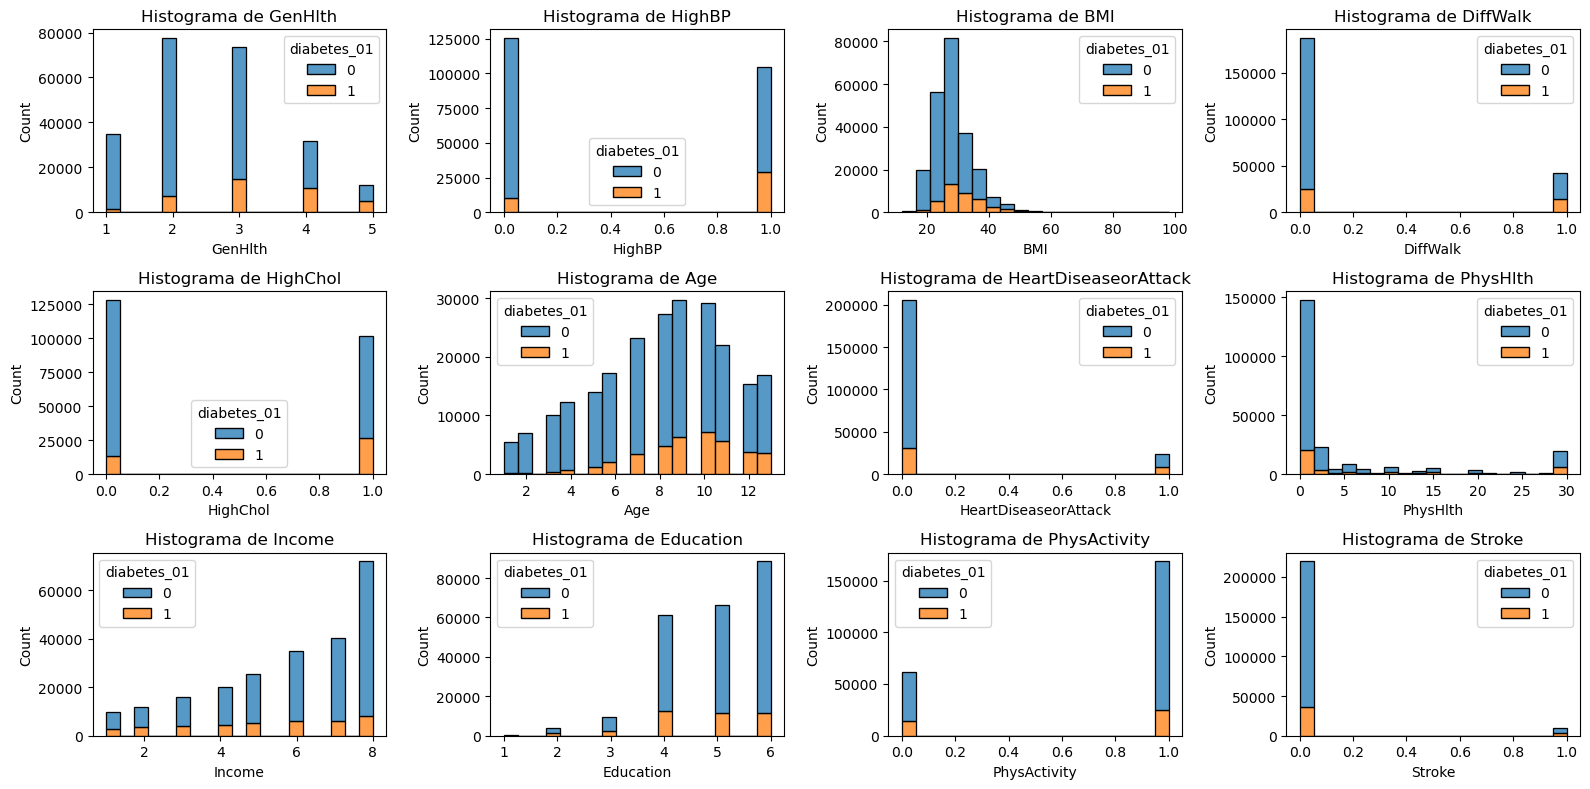

In [17]:
#seleccion de las columnas con mayor correlación.
columnas_para_histograma = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Income','Education', 'PhysActivity', 'Stroke']

num_filas = 3
num_columnas = (len(columnas_para_histograma) + 1) // num_filas
fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(16, 8))

axes = axes.flatten()

for i, col in enumerate(columnas_para_histograma):
    data = subset[col].astype(int)
    k = int(np.ceil(1 + np.log2(len(data))))  # Regla de Sturges
    
    sns.histplot(data=subset, x=col, hue='diabetes_01', bins=k, ax=axes[i], multiple='stack')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout() ##no sobreponer las leyendas
plt.show()

Observaciones:

*GenHlth: Más personas con evaluacion de 3 tienen diabetes en comparacion con las peor evaluadas en salud genera.

*Income, Education: A mayor ingresos, y educacion, mas positivos.

*BMI:parece que las medias de bmi entre pacientes positivos y negativos es igual.

In [ ]:
#La media de BMI entre los positivos y negativos es la misma?
bmi_sin_diabetes = datos_diabetes[datos_diabetes['diabetes_01'] == 0]['BMI']
bmi_con_diabetes = datos_diabetes[datos_diabetes['diabetes_01'] == 1]['BMI']

print(f'BMI promedio de pacientes sin diabetes:{bmi_sin_diabetes.mean()}')
print(f'BMI promedio de pacientes con diabetes:{bmi_con_diabetes.mean()}')



BMI promedio de pacientes sin diabetes:28.03052800505117
BMI promedio de pacientes con diabetes:31.819966772390877


In [37]:
from scipy import stats as st

est = np.std(bmi_sin_diabetes)/len(bmi_sin_diabetes)
equalvar =  abs((np.var(bmi_sin_diabetes)-np.var(bmi_con_diabetes))/(np.var(bmi_sin_diabetes)+np.var(bmi_con_diabetes)))*100
print('Diferencia porcentual de las varianzas de las poblaciones',equalvar,'%')
# AL ser menor del 20%, se calcula 
alpha = 0.05  # el nivel de significancia estadística crítica
results = st.ttest_ind(bmi_sin_diabetes, bmi_con_diabetes) # realizar una prueba

#p-value: la probabilidad de ver el valor de la estadistica tan extremo como se calcula en las muestras.
print('Valor p: {:.10f}'.format(results.pvalue))

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

print('Por lo tanto, la media de BMI de los pacientes con diabtes y sin diabetes debe ser distinta.' )


Diferencia porcentual de las varianzas de las poblaciones 12.526258714557677 %
Valor p: 0.0000000000
Rechazamos la hipótesis nula
Por lo tanto, la media de BMI de los pacientes con diabtes y sin diabetes debe ser distinta.


In [36]:
from fitter import Fitter
import fitter
import easydev


# 80 distribuciones
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', ]

# Atributo
fitter = Fitter(subset.diabetes, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)


AttributeError: 'DataFrame' object has no attribute 'diabetes'

In [ ]:
from fitter import get_distributions
get_distributions()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X = datos_diabetes.drop("diabetes", axis=1)
y = datos_diabetes["diabetes"]

chi2_selector = SelectKBest(chi2, k="all")  
X_kbest = chi2_selector.fit_transform(X, y)


chi2_scores = chi2_selector.scores_

chi2_results = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi2_scores
})

chi2_results = chi2_results.sort_values(by="Chi2 Score", ascending=False)

chi2_results

In [ ]:
datos_diabetes.var()